
### Cos'è una Tabella Pivot?

Una tabella pivot è uno strumento che consente di riepilogare e riorganizzare i dati da un DataFrame per facilitare l'analisi. Si possono aggregare i dati in modo dinamico per visualizzare sommari, medie, conteggi e altre statistiche.

### Struttura delle Tabelle Pivot

Le tabelle pivot in Pandas sono create usando il metodo `pivot_table()`, che accetta diversi parametri chiave:

-   **data**: Il DataFrame di input.
-   **values**: La colonna o le colonne da aggregare.
-   **index**: Le colonne da usare come indici delle righe.
-   **columns**: Le colonne da usare come intestazioni delle colonne.
-   **aggfunc**: La funzione di aggregazione da applicare (ad esempio, `mean`, `sum`, `count`).


Nella creazione di una tabella pivot:

-   **"Colonna o colonne da aggregare" (values)**:
    -   Si riferisce ai dati numerici che si desidera sintetizzare o riassumere.
    -   Ad esempio, in un dataset di vendite, le colonne 'Vendite' e 'Profitto' possono essere aggregate per ottenere totali, medie, ecc.
-   **"Colonne da usare come indici" (index)**:
    -   Sono quelle che determineranno le righe della tabella pivot.
    -   Organizzano i dati in base a una o più categorie, come 'Anno' o 'Regione'.
-   **"Colonne da usare come intestazioni" (columns)**:
    -   Definiscono le colonne della tabella pivot.
    -   Creano una distribuzione dei dati basata su valori unici di una particolare categoria, come 'Mese' o 'Prodotto'.

Supponiamo di avere questa tabella: 

| Anno | Mese | Regione | Prodotto | Vendite | Profitto |
|------|------|---------|----------|---------|----------|
| 2021 | Gen  | Nord    | A        | 200     | 50       |
| 2021 | Gen  | Sud     | B        | 150     | 30       |
| 2021 | Feb  | Nord    | A        | 220     | 60       |
| 2021 | Feb  | Sud     | B        | 180     | 45       |
| 2022 | Gen  | Nord    | A        | 210     | 55       |
| 2022 | Gen  | Sud     | B        | 160     | 35       |
| 2022 | Feb  | Nord    | A        | 230     | 65       |
| 2022 | Feb  | Sud     | B        | 190     | 50       |


### Esempio 1: Tabella Pivot con `Anno` come Index, `Mese` come Columns e `Vendite` come Values

In questa configurazione, vogliamo vedere le vendite totali per ogni anno suddivise per mese.

| Anno | Gen | Feb |
|------|-----|-----|
| 2021 | 350 | 400 |
| 2022 | 370 | 420 |

### Esempio 2: Tabella Pivot con `Regione` come Index, `Prodotto` come Columns e `Profitto` come Values

Qui vogliamo analizzare i profitti per ogni regione e prodotto.

| Regione | A  | B  |
|---------|----|----|
| Nord    | 230| 0  |
| Sud     | 0  | 160|

### Esempio 3: Tabella Pivot con `Anno` e `Mese` come Index, `Regione` come Columns e `Vendite` come Values

In questa configurazione, visualizziamo le vendite per ogni combinazione di anno e mese, suddivise per regione.

| Anno | Mese | Nord | Sud |
|------|------|------|-----|
| 2021 | Gen  | 200  | 150 |
| 2021 | Feb  | 220  | 180 |
| 2022 | Gen  | 210  | 160 |
| 2022 | Feb  | 230  | 190 |

### Esempio 4: Tabella Pivot con `Anno` come Index, `Regione` come Columns e `Profitto` come Values

Infine, possiamo vedere i profitti totali per anno e regione.

| Anno | Nord | Sud |
|------|------|-----|
| 2021 | 110  | 75  |
| 2022 | 120  | 85  |




In [1]:
import pandas as pd

data = {
    'Region': ['North', 'North', 'North', 'South', 'South', 'South', 'East', 'East', 'West', 'West', 'West'],
    'Product': ['B', 'B', 'C', 'A', 'B', 'C', 'A', 'B', 'A', 'C', 'A'],
    'Month': ['Jan', 'Jan', 'Jan', 'Feb', 'Feb', 'Feb', 'Mar', 'Mar', 'Apr', 'Apr', 'May'],
    'Sales': [220, 180, 300, 150, 200, 250, 100, 130, 90, 160, 20]
}

df = pd.DataFrame(data)

df.loc[df['Product'] == 'B']

,Region,Product,Month,Sales
0,North,B,Jan,220
1,North,B,Jan,180
4,South,B,Feb,200
7,East,B,Mar,130


In [2]:

pivot = pd.pivot_table(data=df, index=["Month", "Region"], columns="Product", values="Sales", aggfunc={"Sales": ['count']})

### Multi indicizzazione

Quando utilizzi due colonne come columns in una tabella pivot, la tabella risultante avrà una struttura più complessa, con una multi-indicizzazione per le colonne. Questo significa che la tabella avrà livelli aggiuntivi di intestazioni di colonna, permettendo di suddividere i dati in categorie più dettagliate.

Esempio: Due Colonne come columns
Supponiamo di avere il seguente dataset:

| Anno | Mese | Regione | Prodotto | Vendite | Profitto |
|------|------|---------|----------|---------|----------|
| 2021 | Gen  | Nord    | A        | 200     | 50       |
| 2021 | Gen  | Sud     | B        | 150     | 30       |
| 2021 | Feb  | Nord    | A        | 220     | 60       |
| 2021 | Feb  | Sud     | B        | 180     | 45       |
| 2022 | Gen  | Nord    | A        | 210     | 55       |
| 2022 | Gen  | Sud     | B        | 160     | 35       |
| 2022 | Feb  | Nord    | A        | 230     | 65       |
| 2022 | Feb  | Sud     | B        | 190     | 50       |


Tabella Pivot con:
- index = Anno, 
- columns = Mese, Regione
- values = Vendite


In questa configurazione, vogliamo vedere le vendite totali per ogni anno, suddivise per mese e regione.



| Mese |       | Gen          |       | Feb          |       |
| Anno |       | Nord | Sud   |       | Nord | Sud   |       |
|------|-------|------|-------|-------|------|-------|-------|
| 2021 |       | 200  | 150   |       | 220  | 180   |       |
| 2022 |       | 210  | 160   |       | 230  | 190   |       |
In questa tabella pivot, le intestazioni delle colonne sono suddivise su due livelli:

Il primo livello è il Mese (Gen, Feb).
Il secondo livello è la Regione (Nord, Sud).

Tabella Pivot con Anno e Mese come Index, Regione e Prodotto come Columns, e Vendite come Values
Se vogliamo una struttura ancora più complessa:


| Anno | Mese |       | Nord      |         | Sud       |         |
|------|------|-------|-----------|---------|-----------|---------|
|      |      |       | A         | B       | A         | B       |
|------|------|-------|-----------|---------|-----------|---------|
| 2021 | Gen  |       | 200       |         |           | 150     |
| 2021 | Feb  |       | 220       |         |           | 180     |
| 2022 | Gen  |       | 210       |         |           | 160     |
| 2022 | Feb  |       | 230       |         |           | 190     |
In questo caso, le intestazioni delle colonne hanno tre livelli:

Il primo livello è la Regione (Nord, Sud).
Il secondo livello è il Prodotto (A, B).
Le righe sono indicizzate sia per Anno che per Mese.
Utilizzando più colonne come columns in una tabella pivot, possiamo ottenere una visualizzazione dettagliata e organizzata dei dati, facilitando l'analisi approfondita delle diverse combinazioni di categorie.

In [3]:
pivot.index

MultiIndex([('Apr',  'West'),
            ('Feb', 'South'),
            ('Jan', 'North'),
            ('Mar',  'East'),
            ('May',  'West')],
           names=['Month', 'Region'])

In [4]:
pivot.index

MultiIndex([('Apr',  'West'),
            ('Feb', 'South'),
            ('Jan', 'North'),
            ('Mar',  'East'),
            ('May',  'West')],
           names=['Month', 'Region'])

In [5]:
pivot

count          
Product          A    B    C
Month Region                
Apr   West     1.0  NaN  1.0
Feb   South    1.0  1.0  1.0
Jan   North    NaN  2.0  1.0
Mar   East     1.0  1.0  NaN
May   West     1.0  NaN  NaN

In [6]:
pivot.loc['Apr', 'West']['count']['A']

1.0

In [7]:
pivot.unstack()

count                                                             
Product     A                     B                     C                 
Region   East North South West East North South West East North South West
Month                                                                     
Apr       NaN   NaN   NaN  1.0  NaN   NaN   NaN  NaN  NaN   NaN   NaN  1.0
Feb       NaN   NaN   1.0  NaN  NaN   NaN   1.0  NaN  NaN   NaN   1.0  NaN
Jan       NaN   NaN   NaN  NaN  NaN   2.0   NaN  NaN  NaN   1.0   NaN  NaN
Mar       1.0   NaN   NaN  NaN  1.0   NaN   NaN  NaN  NaN   NaN   NaN  NaN
May       NaN   NaN   NaN  1.0  NaN   NaN   NaN  NaN  NaN   NaN   NaN  NaN

In [8]:
pivot.stack()

/var/folders/bp/vpf4133s7wjb10lznth5p4900000gn/T/ipykernel_82721/1039816244.py:1: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  pivot.stack()


count
Month Region Product       
Apr   West   A          1.0
             C          1.0
Feb   South  A          1.0
             B          1.0
             C          1.0
Jan   North  B          2.0
             C          1.0
Mar   East   A          1.0
             B          1.0
May   West   A          1.0

In [9]:
df = pd.read_csv('sales.csv', encoding= 'unicode_escape')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [11]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [13]:
# Estrarre anno e mese
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month

# Visualizziamo le prime righe per confermare l'estrazione
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12


In [28]:
# Creazione della tabella pivot
pivot_table = pd.pivot_table(df, 
                             values='Quantity', 
                             index=['Year', 'Month'], 
                             aggfunc='sum')

pivot_table

Quantity
Year Month          
2010 12       342228
2011 1        308966
     2        277989
     3        351872
     4        289098
     5        380391
     6        341623
     7        391116
     8        406199
     9        549817
     10       570532
     11       740286
     12       226333

In [29]:
pivot_table_regions = pd.pivot_table(df, 
                                     values='Quantity', 
                                     index='Country', 
                                     aggfunc='sum')

# Ordinare la tabella per la somma delle quantità vendute in ordine decrescente
pivot_table_regions = pivot_table_regions.sort_values(by='Quantity', ascending=False)

# Visualizzare la tabella pivot delle prime 10 regioni
top_10_regions = pivot_table_regions.head(10)
print(top_10_regions)

                Quantity
Country                 
United Kingdom   4263829
Netherlands       200128
EIRE              142637
Germany           117448
France            110480
Australia          83653
Sweden             35637
Switzerland        30325
Spain              26824
Japan              25218


<Figure size 1200x800 with 0 Axes>

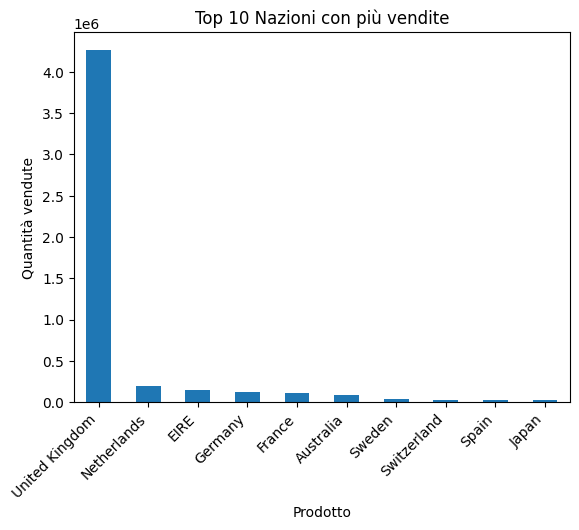

In [32]:
import matplotlib.pyplot as plt

# Creazione del grafico a barre per i prodotti più venduti
plt.figure(figsize=(12, 8))
top_10_regions.plot(kind='bar', legend=False)
plt.title('Top 10 Nazioni con più vendite')
plt.xlabel('Prodotto')
plt.ylabel('Quantità vendute')
plt.xticks(rotation=45, ha='right')
plt.show()

Mese        1         2         3         4         5         6         7   \
Anno                                                                         
2010       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2011  308966.0  277989.0  351872.0  289098.0  380391.0  341623.0  391116.0   

Mese        8         9         10        11        12  
Anno                                                    
2010       NaN       NaN       NaN       NaN  342228.0  
2011  406199.0  549817.0  570532.0  740286.0  226333.0  


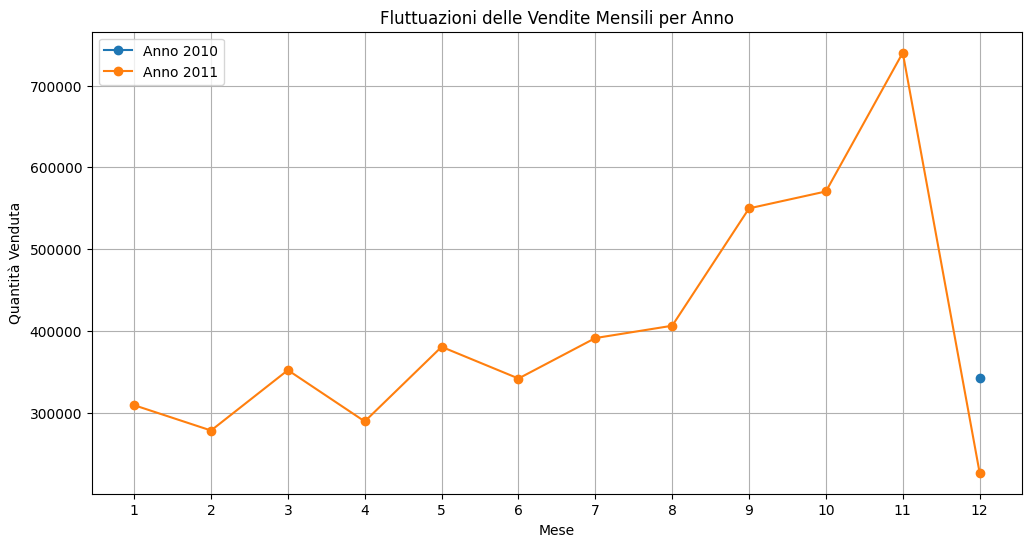

In [33]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Estrarre anno e mese
df['Anno'] = df['InvoiceDate'].dt.year
df['Mese'] = df['InvoiceDate'].dt.month

# Creazione della tabella pivot per analizzare le fluttuazioni delle vendite
pivot_table_sales_fluctuations = pd.pivot_table(df, 
                                                values='Quantity', 
                                                index='Anno', 
                                                columns='Mese', 
                                                aggfunc='sum')

# Visualizzazione della tabella pivot
print(pivot_table_sales_fluctuations)

# Creazione del grafico a linee per visualizzare le fluttuazioni delle vendite
plt.figure(figsize=(12, 6))
for year in pivot_table_sales_fluctuations.index:
    plt.plot(pivot_table_sales_fluctuations.columns, pivot_table_sales_fluctuations.loc[year], marker='o', label=f'Anno {year}')

plt.title('Fluttuazioni delle Vendite Mensili per Anno')
plt.xlabel('Mese')
plt.ylabel('Quantità Venduta')
plt.legend()
plt.grid(True)
plt.xticks(range(1, 13))  # Mesi da 1 a 12
plt.show()

In [41]:
pivot_table_multi_columns = pd.pivot_table(df, 
                                           values='Quantity', 
                                           index=['Country'], 
                                           columns=['Anno', 'Mese'], 
                                           aggfunc='sum')

# Visualizzare una porzione della tabella pivot
pivot_table_multi_columns.head()

Anno         2010    2011                                                    \
Mese           12      1       2        3       4       5        6       7    
Country                                                                       
Australia   454.0  5644.0  8659.0  10329.0   117.0  9073.0  15973.0  5185.0   
Austria       3.0     NaN   342.0    982.0   311.0   476.0     -6.0   573.0   
Bahrain      54.0   -54.0     NaN      NaN     NaN   260.0      NaN     NaN   
Belgium    1755.0   783.0  1097.0   1776.0  1173.0  1825.0   2244.0  1678.0   
Brazil        NaN     NaN     NaN      NaN   356.0     NaN      NaN     NaN   

Anno                                                
Mese            8       9       10      11      12  
Country                                             
Australia  12570.0  4043.0  7401.0  4205.0     NaN  
Austria      790.0     NaN   491.0   717.0   148.0  
Bahrain        NaN     NaN     NaN     NaN     NaN  
Belgium     2061.0  1957.0  3156.0  2550.0  1097.0  
Brazil         NaN     NaN     NaN     NaN     NaN

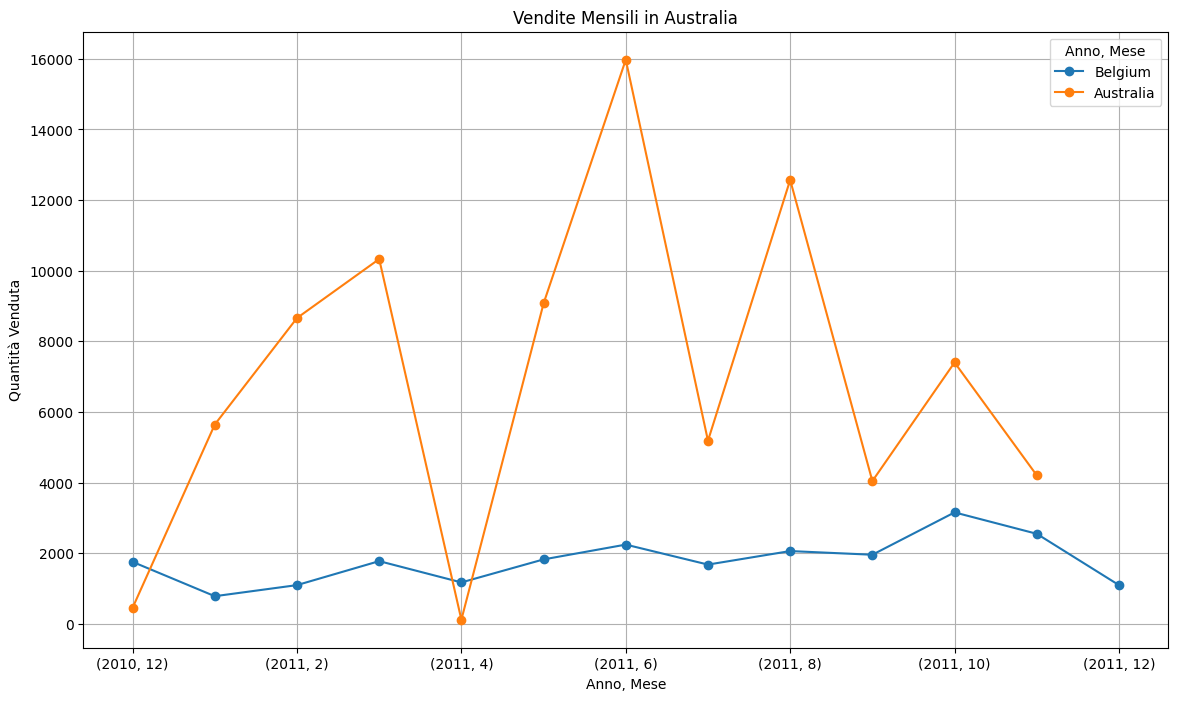

In [52]:
country_1      = pivot_table_multi_columns.loc['Belgium']
country_2      = pivot_table_multi_columns.loc['Australia']

# Creazione del grafico a linee
plt.figure(figsize=(14, 8))
country_1.plot(kind='line', marker='o', title='Vendite Mensili nel Belgium')
country_2.plot(kind='line', marker='o', title='Vendite Mensili in Australia')
plt.xlabel('Anno, Mese')
plt.ylabel('Quantità Venduta')
plt.legend(title='Anno, Mese')
plt.grid(True)
plt.show()